In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [399]:
df1 = pd.read_csv("Defaulters.csv")

    we copy this dataset df1 into another defaulters dataset which will be used for all further computations
    First look at some of the data to check if data has been read correctly

In [400]:
defaulters = df1.copy()
print(defaulters.shape)
defaulters.head()

(22003, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


    we can see that all the 25 columns have 22003 count which indicates there is no missing value.
    we can see that the repayment status is indicated in columns PAY_0, PAY_2 ... with no PAY_1 column, so we rename PAY_0 to PAY_1 for ease of understanding. 

In [402]:
defaulters.rename(columns={'default_payment_next_month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [67]:
defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,22003.0,11002.000000,6351.863322,1.0,5501.5,11002.0,16502.5,22003.0
LIMIT_BAL,22003.0,162957.945735,128613.702016,10000.0,50000.0,130000.0,230000.0,1000000.0
SEX,22003.0,1.601373,0.489627,1.0,1.0,2.0,2.0,2.0
EDUCATION,22003.0,1.842203,0.775328,0.0,1.0,2.0,2.0,6.0
MARRIAGE,22003.0,1.561287,0.521691,0.0,1.0,2.0,2.0,3.0
AGE,22003.0,35.323410,9.353360,21.0,28.0,34.0,41.0,79.0
PAY_1,22003.0,0.019452,1.122035,-2.0,-1.0,0.0,0.0,8.0
PAY_2,22003.0,-0.103213,1.200108,-2.0,-1.0,0.0,0.0,8.0
PAY_3,22003.0,-0.134527,1.205271,-2.0,-1.0,0.0,0.0,8.0
PAY_4,22003.0,-0.194201,1.166511,-2.0,-1.0,0.0,0.0,8.0


    next we check the datatype of each variable of dataset. We see that all the columns are int64 type whereas from previous knowledge we know that SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default_payment_next_month are categorical features. So we convert these features in categorical

In [68]:
# checking the datatype of each feature
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22003 entries, 0 to 22002
Data columns (total 25 columns):
ID           22003 non-null int64
LIMIT_BAL    22003 non-null int64
SEX          22003 non-null int64
EDUCATION    22003 non-null int64
MARRIAGE     22003 non-null int64
AGE          22003 non-null int64
PAY_1        22003 non-null int64
PAY_2        22003 non-null int64
PAY_3        22003 non-null int64
PAY_4        22003 non-null int64
PAY_5        22003 non-null int64
PAY_6        22003 non-null int64
BILL_AMT1    22003 non-null int64
BILL_AMT2    22003 non-null int64
BILL_AMT3    22003 non-null int64
BILL_AMT4    22003 non-null int64
BILL_AMT5    22003 non-null int64
BILL_AMT6    22003 non-null int64
PAY_AMT1     22003 non-null int64
PAY_AMT2     22003 non-null int64
PAY_AMT3     22003 non-null int64
PAY_AMT4     22003 non-null int64
PAY_AMT5     22003 non-null int64
PAY_AMT6     22003 non-null int64
def_pay      22003 non-null int64
dtypes: int64(25)
memory usage: 4.2 MB


In [69]:
defaulters.isna().sum()    # check for missing values for surity

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

    no missing value hence no imputation, now we directly move towards visualzation of defaulters dataset

* before moving to visualization we first select some features which we feel would be most correlated to the target variable.
    From the data provided we see that we want to predict whether a person will default in payment next month or not.
    This prediction depends mostly on previous repayment history, what is the limiting balance, age, education and marriage.
    Let's plot these first.

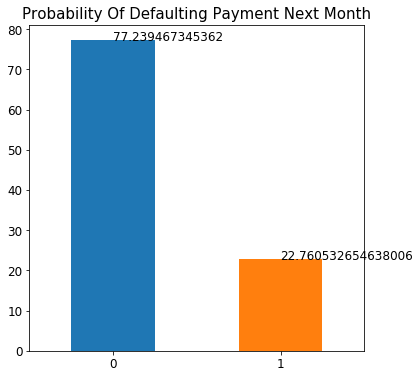

In [240]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
# sns.distplot(defaulters.def_pay)
plt.show()

    We can see that the dataset consists of 77% clients are not expected to default payment whereas 23% clients are expected to default the payment.

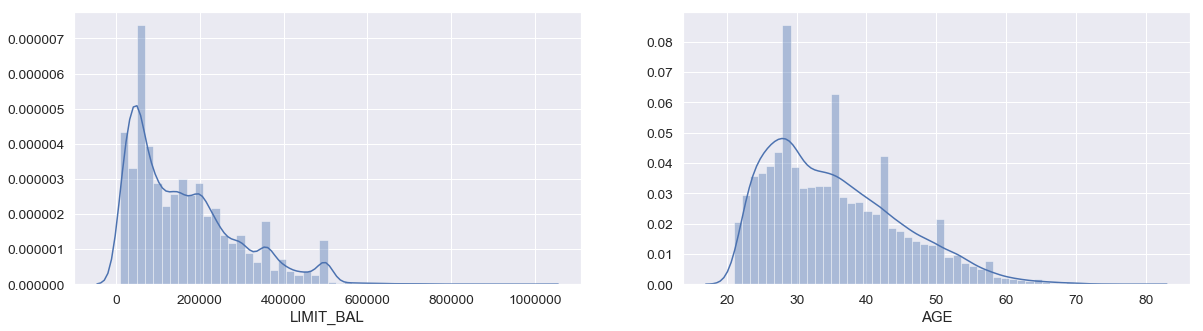

In [72]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

    By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.
    We have more number of clients having limiting balance between 0 to 200000 currency.
    We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.
    We will observe the effect of variables on target variable below

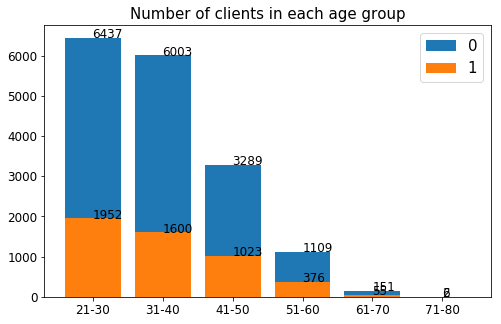

In [237]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()


    We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

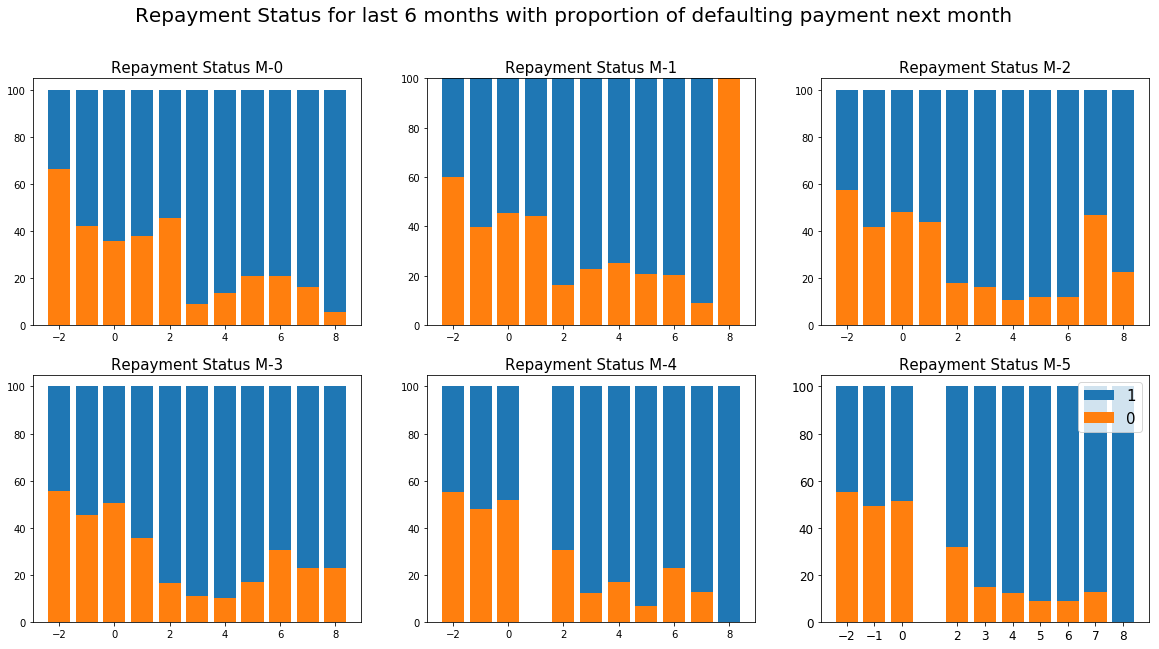

In [247]:
plt.subplots(figsize=(20,10))

ind = sorted(defaulters.PAY_1.unique())
pay_0 = (defaulters.PAY_1[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_1[defaulters['def_pay'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(defaulters.PAY_2.unique())
pay_0 = (defaulters.PAY_2[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_2[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(defaulters.PAY_3.unique())
pay_0 = (defaulters.PAY_3[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_3[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(defaulters.PAY_4.unique())
pay_0 = (defaulters.PAY_4[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_4[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(defaulters.PAY_5.unique())
pay_0 = (defaulters.PAY_5[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_5[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(defaulters.PAY_6.unique())
pay_0 = (defaulters.PAY_6[defaulters['def_pay'] == 0].value_counts(normalize=True))
pay_1 = (defaulters.PAY_6[defaulters['def_pay'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

    Above plot shows us the proportion of clients that will default payment next month based on repayment history.
    For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

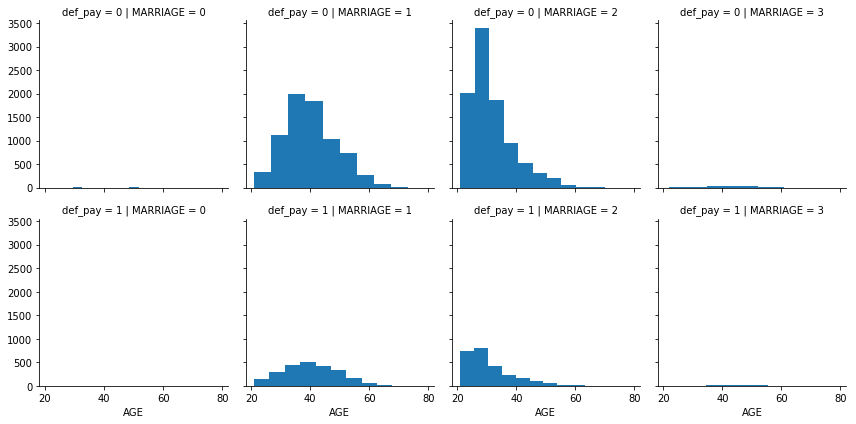

In [204]:
g = sns.FacetGrid(defaulters, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

    From above plot we can infer that married people between age bracket of 30 and 50 and unmarried clients of age 20-30 tend to default payment with unmarried clients higher probability to default payment. Hence we can include MARRIAGE feature of clients to find probability of defaulting the payment next month

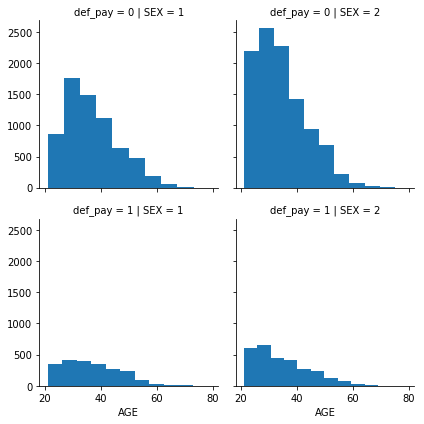

In [243]:
g = sns.FacetGrid(defaulters, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

    It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

* now we will check if the past six months bill amount will affect the payment default next month or not:

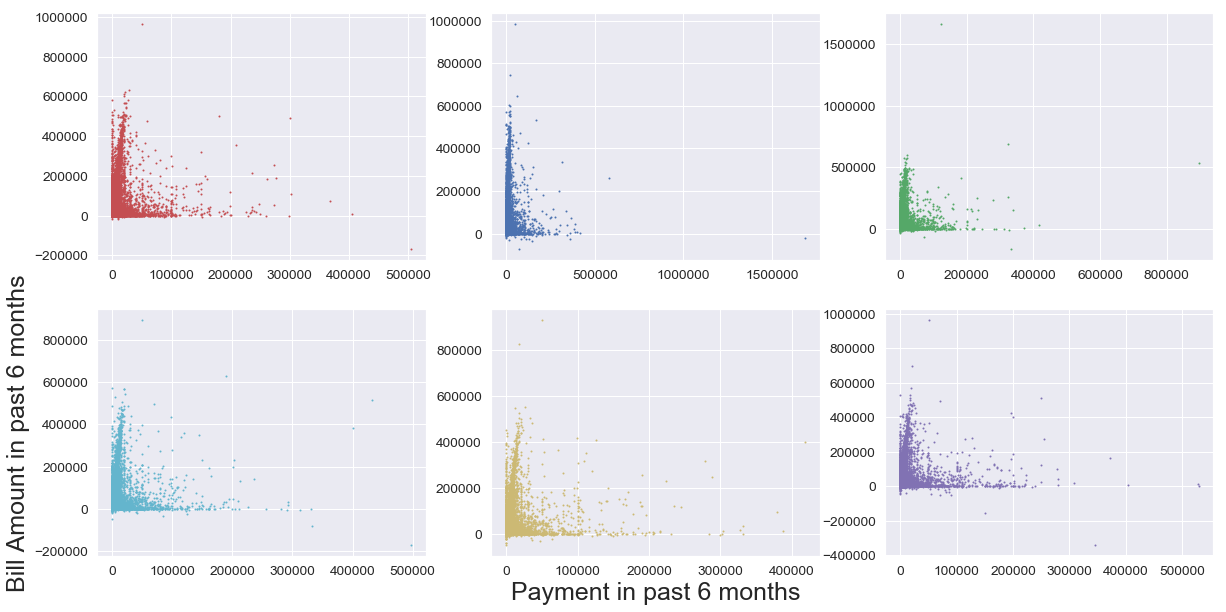

In [39]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.show()

    Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

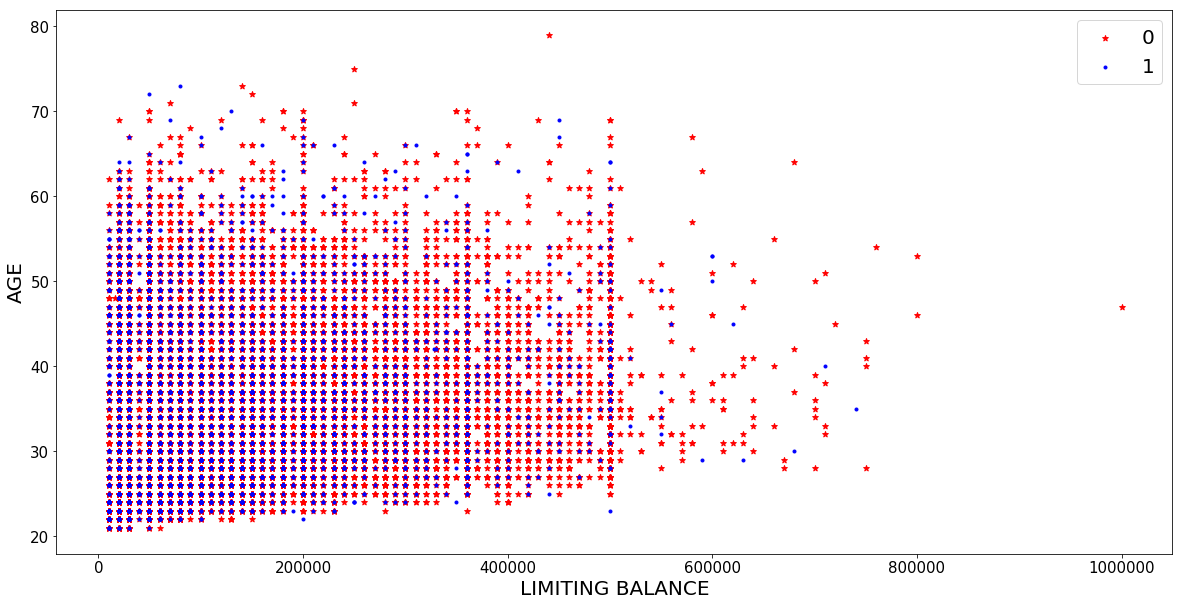

In [161]:
y1 = defaulters.AGE[defaulters["def_pay"] == 0]
y2 = defaulters.AGE[defaulters["def_pay"] == 1]
x1 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 0]
x2 = defaulters.LIMIT_BAL[defaulters["def_pay"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()


    Above plot of Age against limiting balance does not provide any accurate information, as there is mixed variation of clients of all age groups and their current month limiting balance.

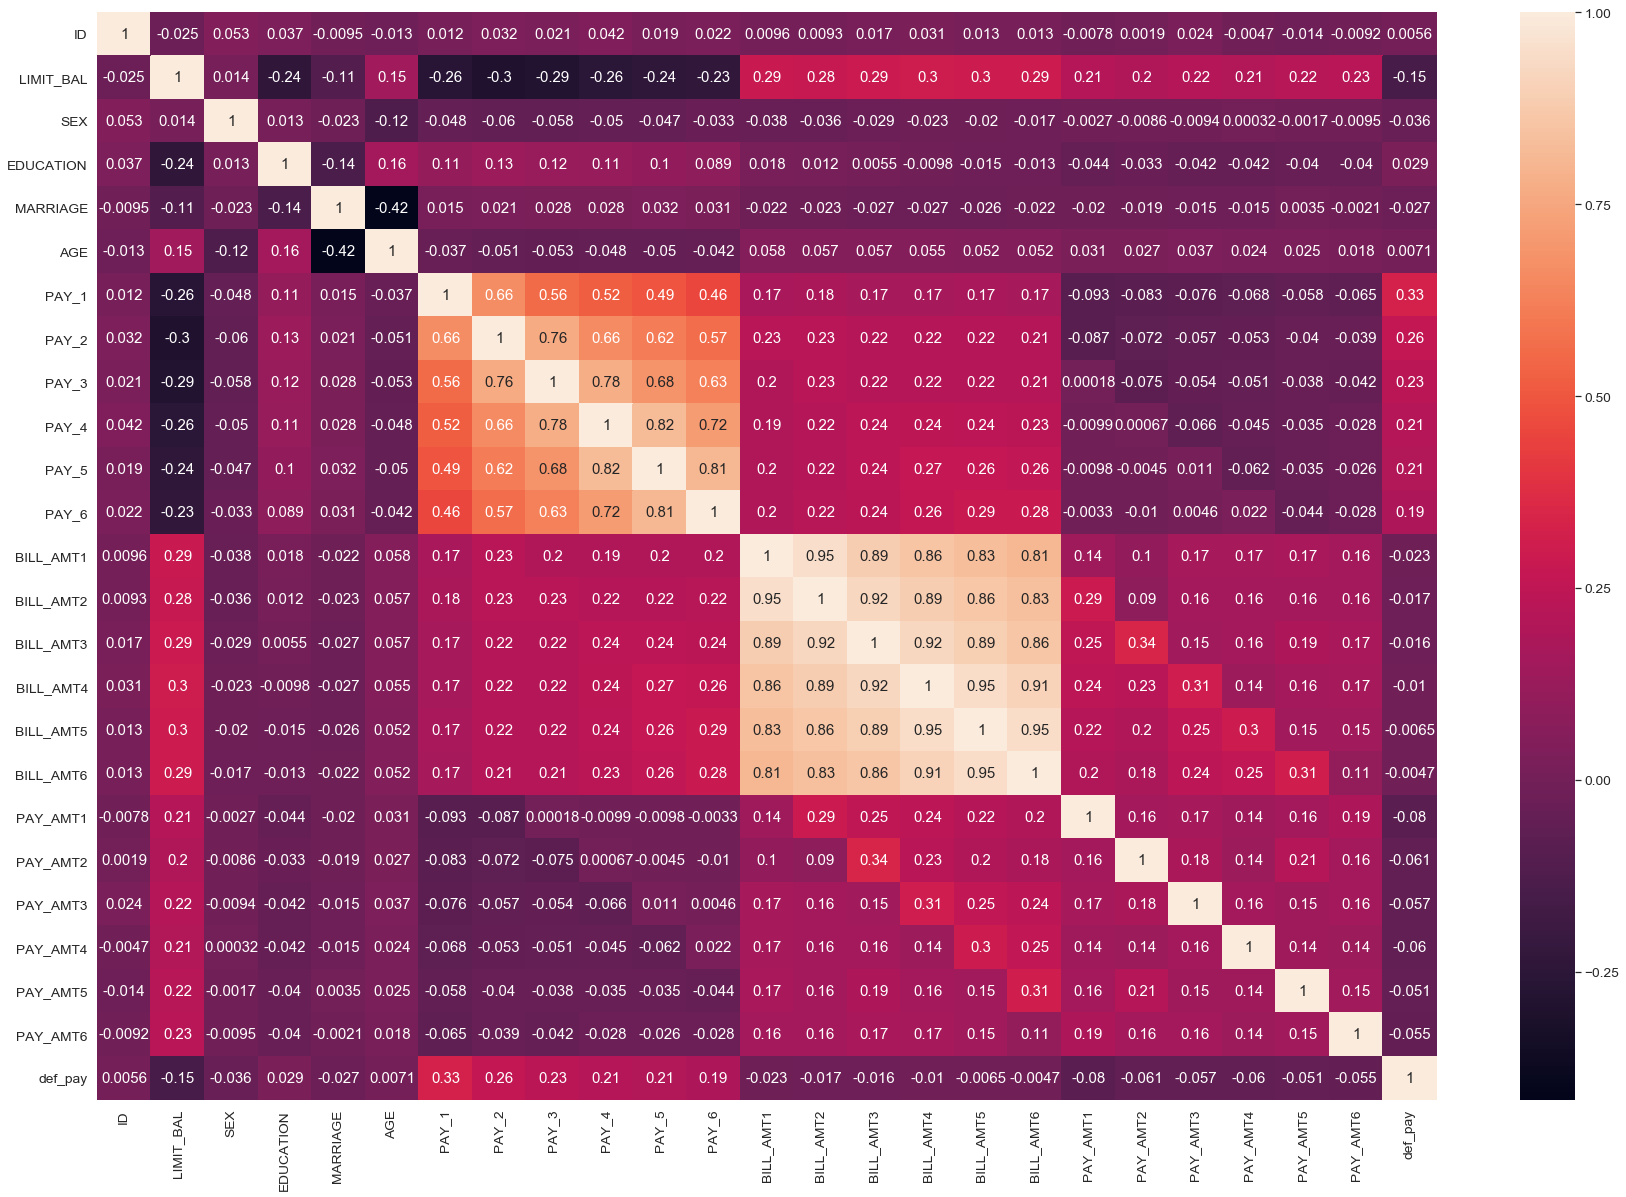

In [409]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

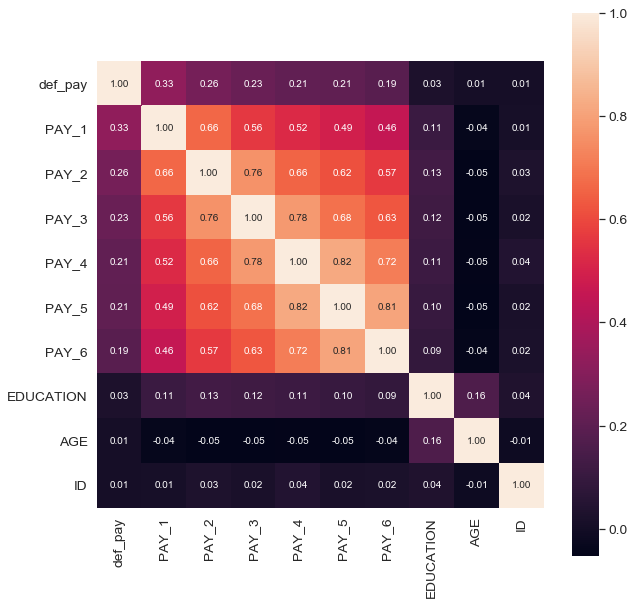

In [405]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = defaulters.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(defaulters[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

    as we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features.
    
    We will first train model wil all the features and try reducing the non-important features.

In [189]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22003 entries, 0 to 22002
Data columns (total 26 columns):
ID           22003 non-null int64
LIMIT_BAL    22003 non-null int64
SEX          22003 non-null int64
EDUCATION    22003 non-null int64
MARRIAGE     22003 non-null int64
AGE          22003 non-null int64
PAY_1        22003 non-null int64
PAY_2        22003 non-null int64
PAY_3        22003 non-null int64
PAY_4        22003 non-null int64
PAY_5        22003 non-null int64
PAY_6        22003 non-null int64
BILL_AMT1    22003 non-null int64
BILL_AMT2    22003 non-null int64
BILL_AMT3    22003 non-null int64
BILL_AMT4    22003 non-null int64
BILL_AMT5    22003 non-null int64
BILL_AMT6    22003 non-null int64
PAY_AMT1     22003 non-null int64
PAY_AMT2     22003 non-null int64
PAY_AMT3     22003 non-null int64
PAY_AMT4     22003 non-null int64
PAY_AMT5     22003 non-null int64
PAY_AMT6     22003 non-null int64
def_pay      22003 non-null int64
AGE_BIN      22003 non-null category
dtyp

In [361]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [303]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      0.78      0.87      4400
          1       0.00      0.00      0.00         1

avg / total       1.00      0.78      0.87      4401

[[3420  980]
 [   1    0]]

Accuracy Score for model1:  0.7770961145194274


    We can see that All the examples are predicted to be negative to default payment next month with 77.7% accuracy whereas in the dataset we have 980 observations that are expected to default payment.
    After doing various random sampling by changing the random_date parameter, we found random_state=10 to be giving highest accuracy for our model1
    
    Lets now try changing the datatypes of categorical variables from int to category

In [317]:
# change the datatype of categorical features from integer to category
defaulters.SEX = defaulters.SEX.astype("category")
defaulters.EDUCATION = defaulters.EDUCATION.astype("category")
defaulters.MARRIAGE = defaulters.MARRIAGE.astype("category")
defaulters.PAY_1 = defaulters.PAY_1.astype("category")
defaulters.PAY_2 = defaulters.PAY_2.astype("category")
defaulters.PAY_3 = defaulters.PAY_3.astype("category")
defaulters.PAY_4 = defaulters.PAY_4.astype("category")
defaulters.PAY_5 = defaulters.PAY_5.astype("category")
defaulters.PAY_6 = defaulters.PAY_6.astype("category")
defaulters.def_type = defaulters.def_pay.astype("category")

In [304]:
df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      0.78      0.87      4400
          1       0.00      0.00      0.00         1

avg / total       1.00      0.78      0.87      4401

[[3420  980]
 [   1    0]]

Accuracy Score for model2:  0.7770961145194274


    Even after changing the datatype of certain variables there is no change if accuracy of the model.
    
    So we evaluate now by dropping the multicollinearity variables and keeping only PAY_1 variable.

In [305]:
df_X = defaulters.drop(['def_pay','AGE_BIN','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model3: ', accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      0.78      0.87      4400
          1       0.00      0.00      0.00         1

avg / total       1.00      0.78      0.87      4401

[[3420  980]
 [   1    0]]

Accuracy Score for model3:  0.7770961145194274


    As we can see even now the accuracy does not change

In [394]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=20)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))

             precision    recall  f1-score   support

          0       1.00      0.79      0.89      2201
          1       0.00      0.00      0.00         0

avg / total       1.00      0.79      0.89      2201

[[1747  454]
 [   0    0]]

Test Accuracy Score for model4:  0.793730122671513

Train Accuracy Score for model4:  0.77002322997677


    We can see that by removing the unimportant and multicollinear data, the accuracy has marginally increased by more than 2%

In [379]:
df_X = defaulters[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

             precision    recall  f1-score   support

          0       0.98      0.79      0.88      6349
          1       0.12      0.68      0.20       252

avg / total       0.95      0.79      0.85      6601

[[5030 1319]
 [  80  172]]

Test Accuracy Score for model5:  0.7880624147856385

Train Accuracy Score for model5:  0.7878197636670562
